In [49]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [50]:
cancer_df = pd.read_csv(r'C:\Users\Ashish\Desktop\machine learning\breast-cancer.csv')

In [51]:
cancer_df.head()

,target,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [52]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   target       286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [53]:
cancer_df.target.value_counts()

target
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64

In [54]:
X_feature = list(cancer_df.columns)
X_feature.remove('target')
X_feature

['age',
 'menopause',
 'tumor_size',
 'inv_nodes',
 'node_caps',
 'deg_malig',
 'breast',
 'breast_quad',
 'irradiat']

In [55]:
encoded_cancer_df = pd.get_dummies(cancer_df[X_feature], drop_first = True)

In [56]:
list(encoded_cancer_df)

['deg_malig',
 'age_30-39',
 'age_40-49',
 'age_50-59',
 'age_60-69',
 'age_70-79',
 'menopause_lt40',
 'menopause_premeno',
 'tumor_size_05-Sep',
 'tumor_size_15-19',
 'tumor_size_20-24',
 'tumor_size_25-29',
 'tumor_size_30-34',
 'tumor_size_35-39',
 'tumor_size_40-44',
 'tumor_size_45-49',
 'tumor_size_50-54',
 'tumor_size_Oct-14',
 'inv_nodes_03-May',
 'inv_nodes_06-Aug',
 'inv_nodes_09-Nov',
 'inv_nodes_15-17',
 'inv_nodes_24-26',
 'inv_nodes_Dec-14',
 'node_caps_no',
 'node_caps_yes',
 'breast_right',
 'breast_quad_central',
 'breast_quad_left_low',
 'breast_quad_left_up',
 'breast_quad_right_low',
 'breast_quad_right_up',
 'irradiat_yes']

In [57]:
encoded_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   deg_malig              286 non-null    int64
 1   age_30-39              286 non-null    bool 
 2   age_40-49              286 non-null    bool 
 3   age_50-59              286 non-null    bool 
 4   age_60-69              286 non-null    bool 
 5   age_70-79              286 non-null    bool 
 6   menopause_lt40         286 non-null    bool 
 7   menopause_premeno      286 non-null    bool 
 8   tumor_size_05-Sep      286 non-null    bool 
 9   tumor_size_15-19       286 non-null    bool 
 10  tumor_size_20-24       286 non-null    bool 
 11  tumor_size_25-29       286 non-null    bool 
 12  tumor_size_30-34       286 non-null    bool 
 13  tumor_size_35-39       286 non-null    bool 
 14  tumor_size_40-44       286 non-null    bool 
 15  tumor_size_45-49       286 non-null    b

In [58]:
boolean_columns = encoded_cancer_df.select_dtypes(include = ['bool']).columns
for col in boolean_columns:
    encoded_cancer_df[col] = encoded_cancer_df[col].astype(int)

In [59]:
encoded_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   deg_malig              286 non-null    int64
 1   age_30-39              286 non-null    int32
 2   age_40-49              286 non-null    int32
 3   age_50-59              286 non-null    int32
 4   age_60-69              286 non-null    int32
 5   age_70-79              286 non-null    int32
 6   menopause_lt40         286 non-null    int32
 7   menopause_premeno      286 non-null    int32
 8   tumor_size_05-Sep      286 non-null    int32
 9   tumor_size_15-19       286 non-null    int32
 10  tumor_size_20-24       286 non-null    int32
 11  tumor_size_25-29       286 non-null    int32
 12  tumor_size_30-34       286 non-null    int32
 13  tumor_size_35-39       286 non-null    int32
 14  tumor_size_40-44       286 non-null    int32
 15  tumor_size_45-49       286 non-null    i

In [60]:
import statsmodels.api as sm
Y = cancer_df.target.map(lambda x : int(x == "recurrence-events") )
X = sm.add_constant(encoded_cancer_df)

In [61]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y ,test_size = 0.3, random_state = 42)

In [62]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion= 'gini', max_depth = 3)
clf_tree.fit(train_X, train_Y)

DecisionTreeClassifier(max_depth=3)

In [63]:
tree_predict = clf_tree.predict(test_X)
metrics.roc_auc_score(test_Y, tree_predict)

0.5301318267419963

In [64]:
clf_tree_entropy = DecisionTreeClassifier(criterion= 'entropy', max_depth=3)
clf_tree_entropy.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [65]:
tree_predict_1 = clf_tree_entropy.predict(test_X)
metrics.roc_auc_score(test_Y, tree_predict_1)

0.5756434400502197

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
tuned_parameters = [{'criterion' : ['gini', 'entropy'], 'max_depth' : range(2,10)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree, tuned_parameters, cv= 10, scoring = 'roc_auc')
clf.fit(train_X, train_Y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [68]:
clf.best_score_

0.7192380952380952

In [69]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [70]:
clf_tree_entropy_1 = DecisionTreeClassifier(criterion= 'entropy', max_depth=2)
clf_tree_entropy_1.fit(train_X, train_Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [71]:
tree_predict_1 = clf_tree_entropy_1.predict(test_X)
metrics.roc_auc_score(test_Y, tree_predict_1)

0.5285624607658506

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

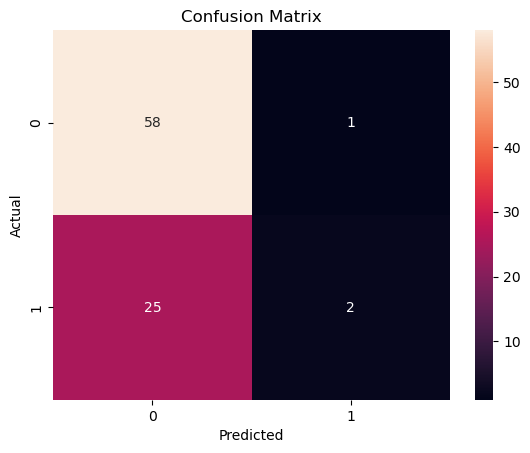

In [73]:
cm = metrics.confusion_matrix(test_Y, tree_predict_1)
sns.heatmap(cm , annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(metrics.classification_report())